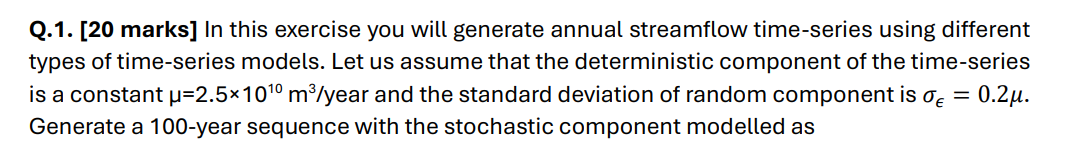

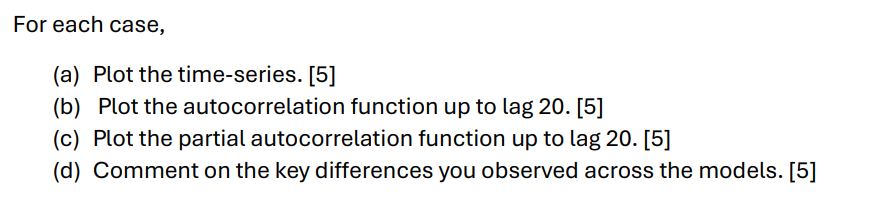

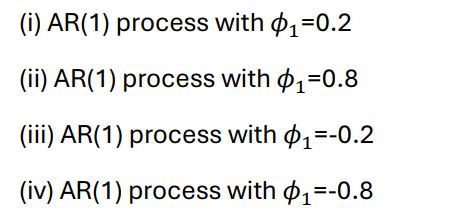

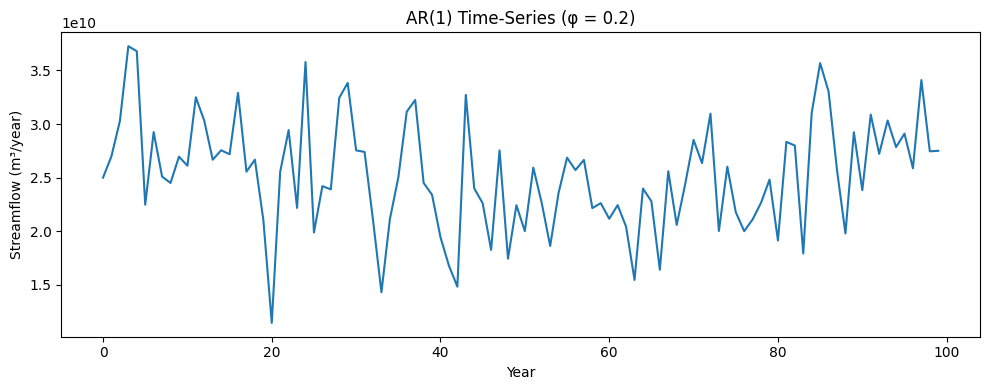

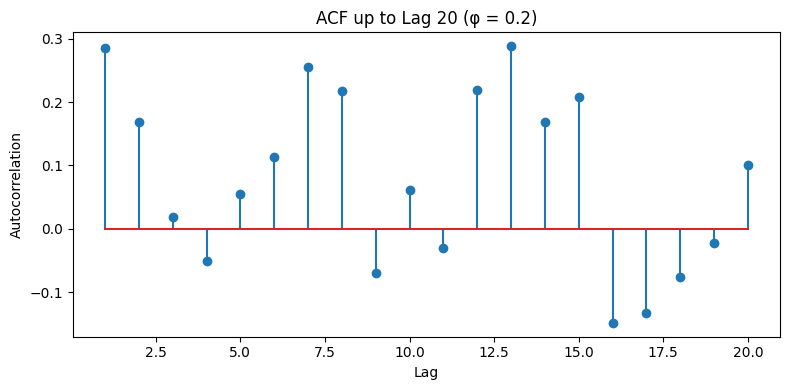

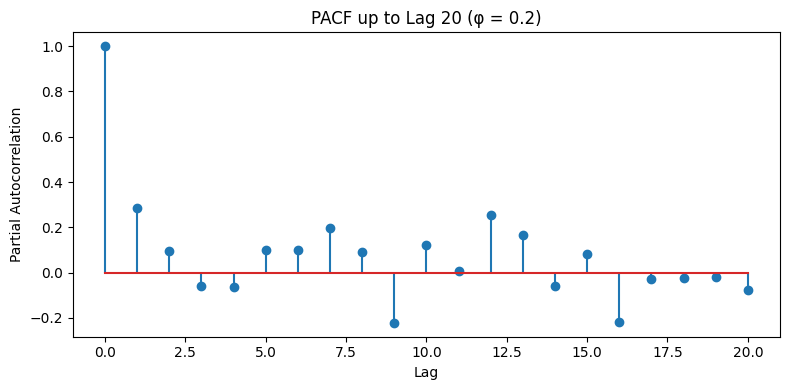

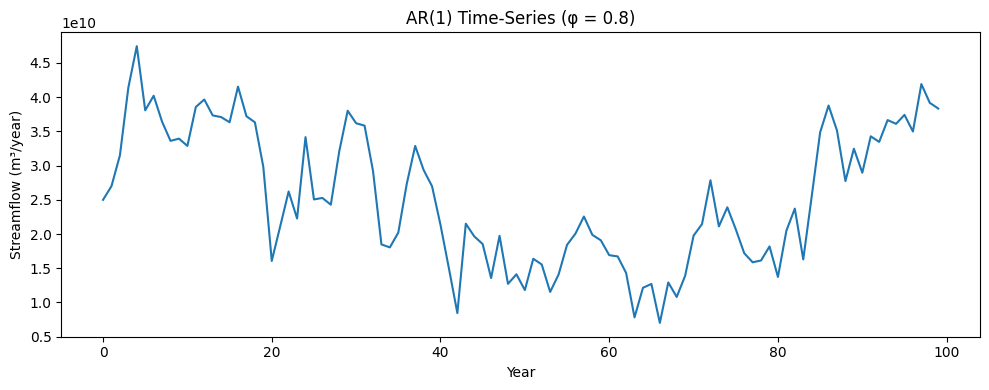

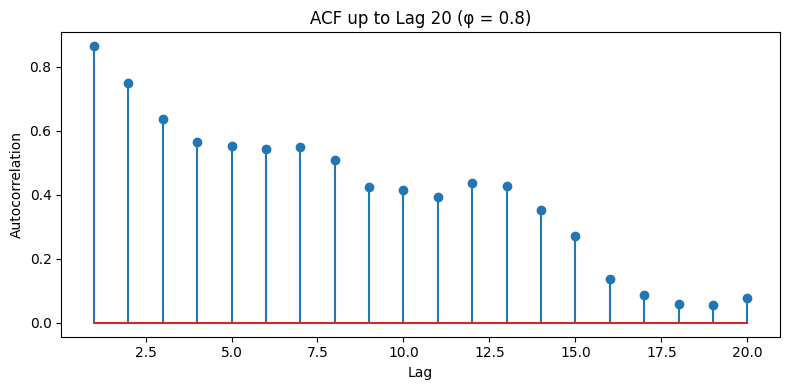

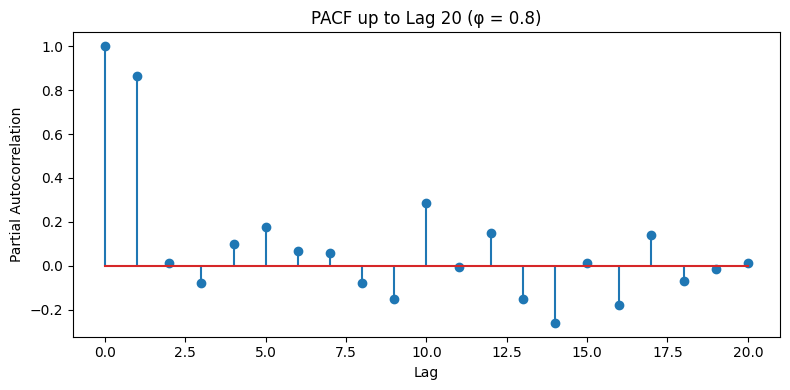

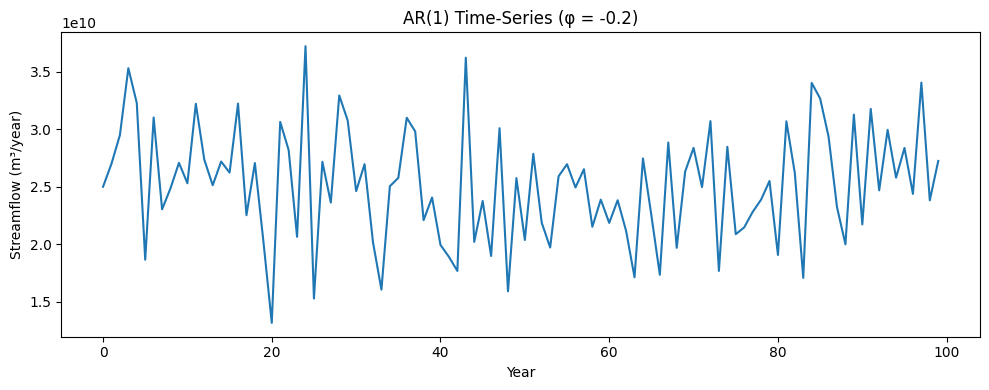

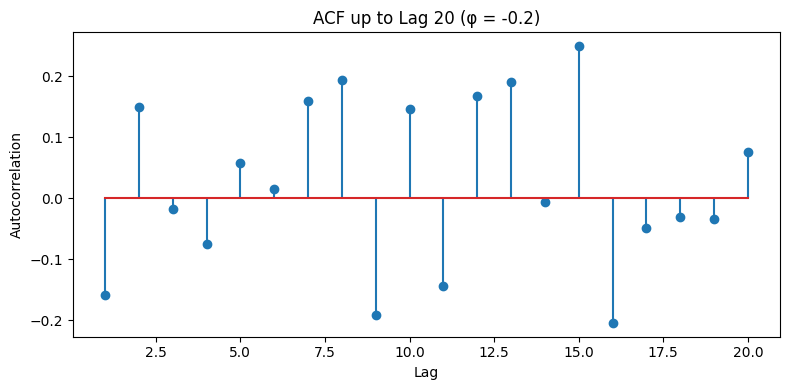

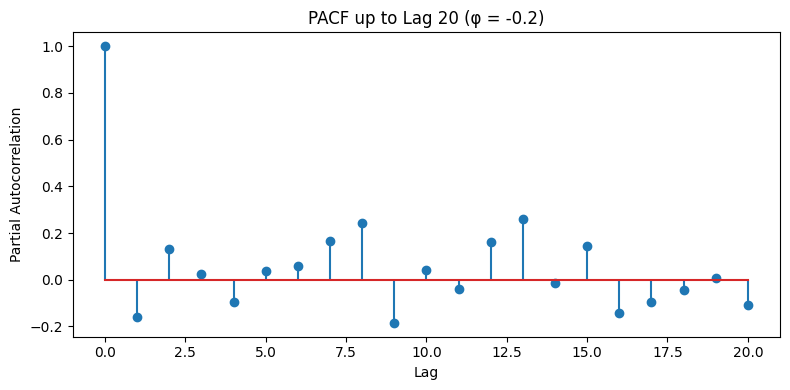

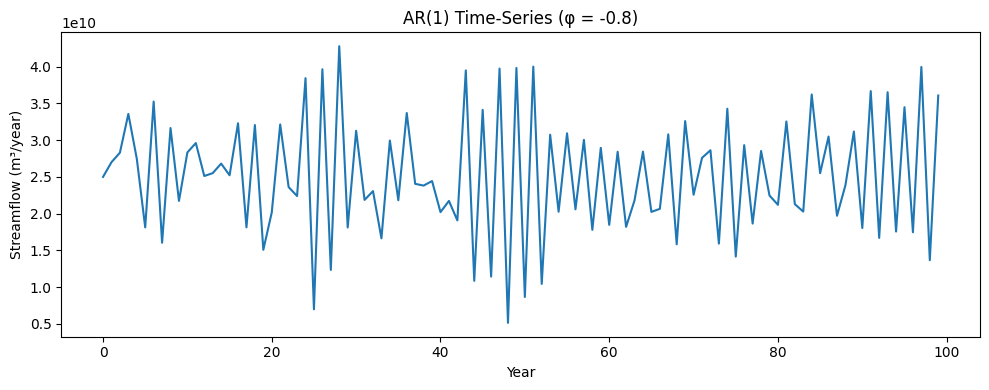

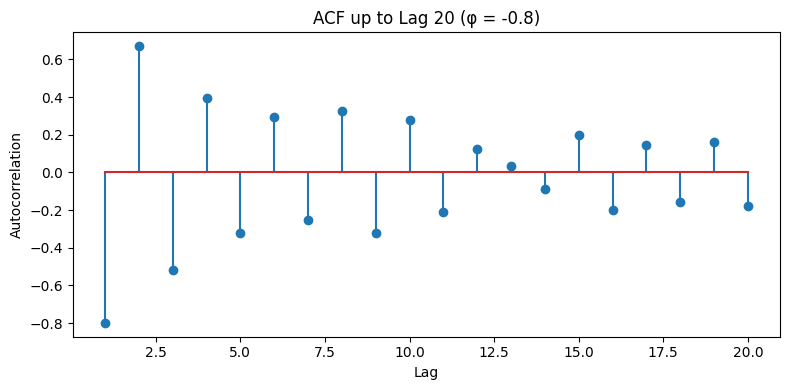

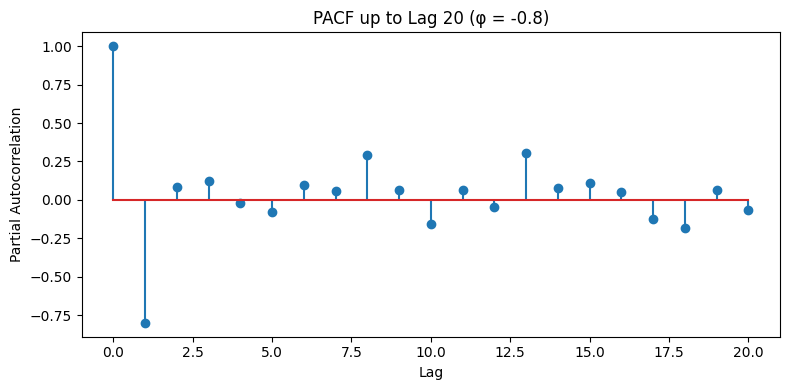

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# -----------------------------
# Given constants
# -----------------------------
mu = 2.5e10
sigma = 0.2 * mu
N = 100

phi_values = [0.2, 0.8, -0.2, -0.8]

# -----------------------------
# Function to generate AR(1)
# -----------------------------
def generate_ar1(phi):
    np.random.seed(0)
    eps = np.random.normal(0, sigma, N)
    x = np.zeros(N)
    x[0] = mu
    for t in range(1, N):
        x[t] = mu + phi * (x[t-1] - mu) + eps[t]
    return x

# -----------------------------
# LOOP THROUGH ALL φ VALUES
# -----------------------------
for phi in phi_values:

    x = generate_ar1(phi)

    # ---------- (a) Time-Series ----------
    plt.figure(figsize=(10, 4))
    plt.plot(x)
    plt.title(f"AR(1) Time-Series (φ = {phi})")
    plt.xlabel("Year")
    plt.ylabel("Streamflow (m³/year)")
    plt.tight_layout()
    plt.show()

    # ---------- (b) ACF ----------
    def autocorr(series, lag):
        return np.corrcoef(series[:-lag], series[lag:])[0, 1]

    lags = np.arange(1, 21)
    acf_vals = [autocorr(x, lag) for lag in lags]

    plt.figure(figsize=(8, 4))
    plt.stem(lags, acf_vals)
    plt.title(f"ACF up to Lag 20 (φ = {phi})")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()

    # ---------- (c) PACF ----------
    pac_vals = pacf(x, nlags=20, method='yw')
    lags_full = np.arange(0, 21)

    plt.figure(figsize=(8, 4))
    plt.stem(lags_full, pac_vals)
    plt.title(f"PACF up to Lag 20 (φ = {phi})")
    plt.xlabel("Lag")
    plt.ylabel("Partial Autocorrelation")
    plt.tight_layout()
    plt.show()

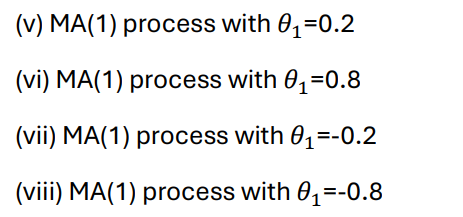

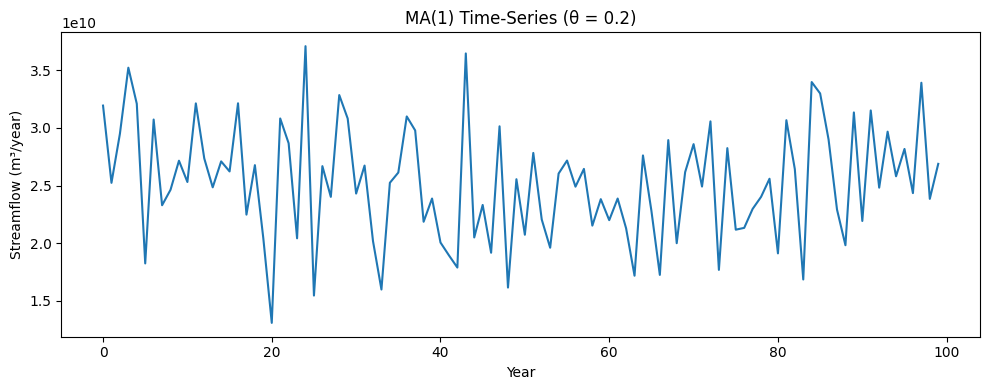

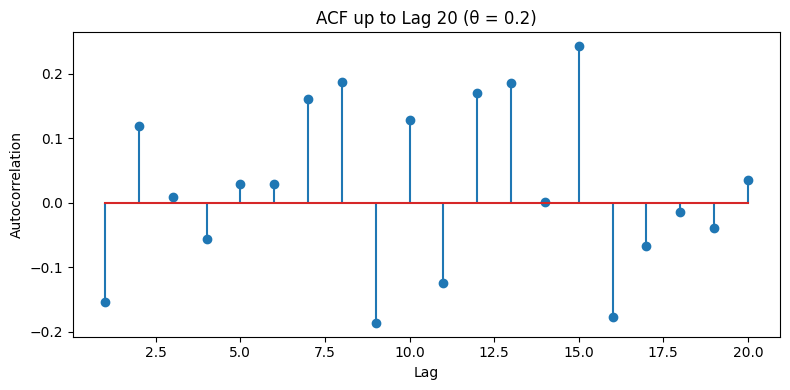

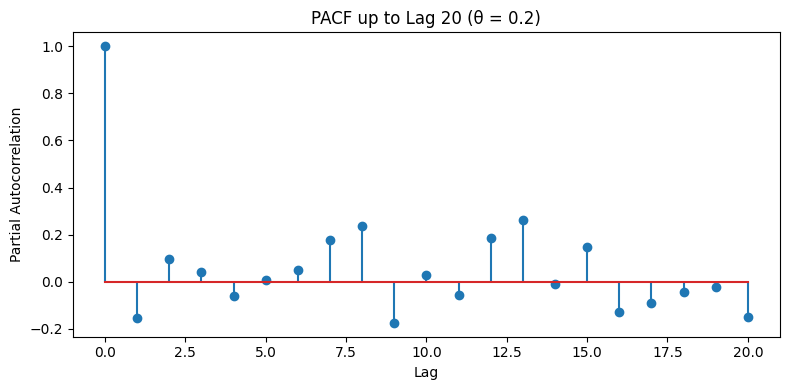

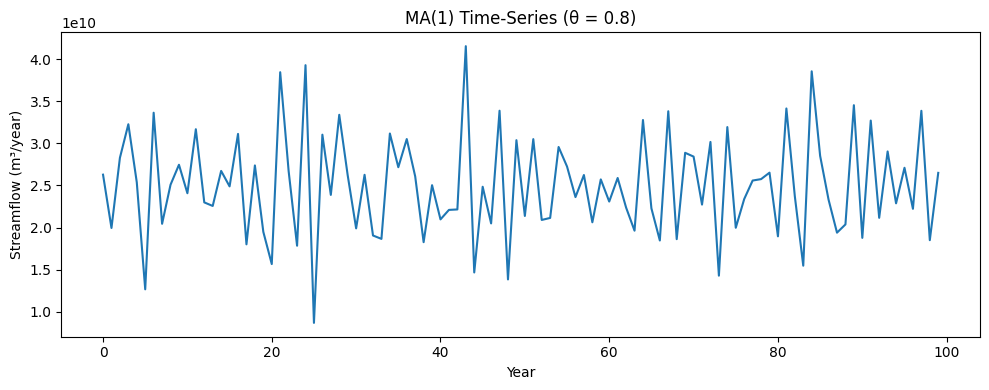

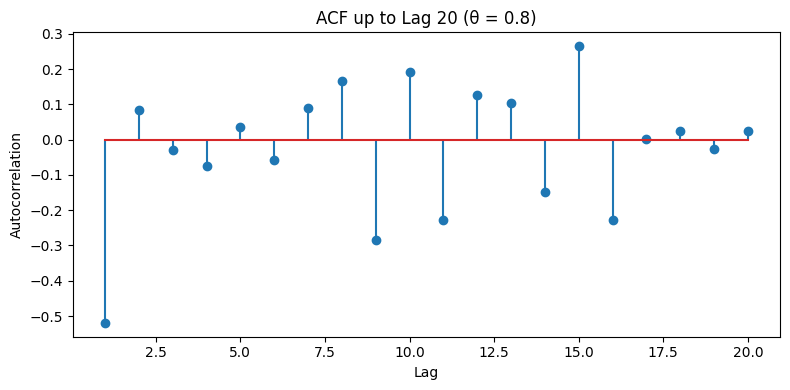

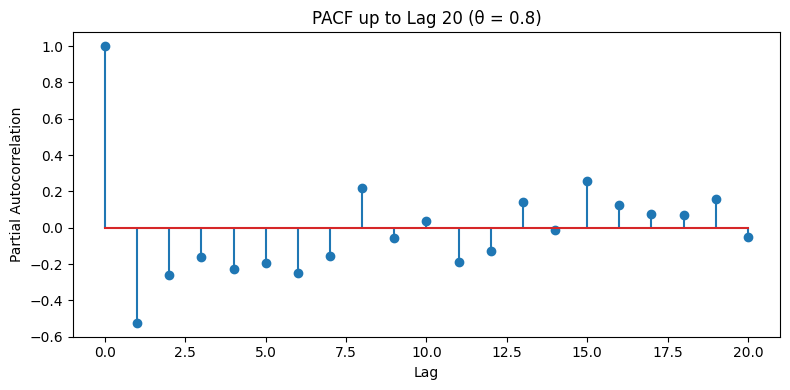

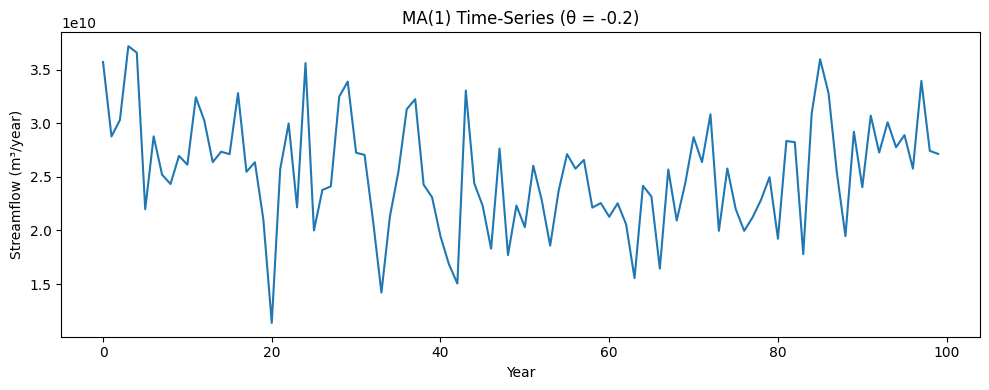

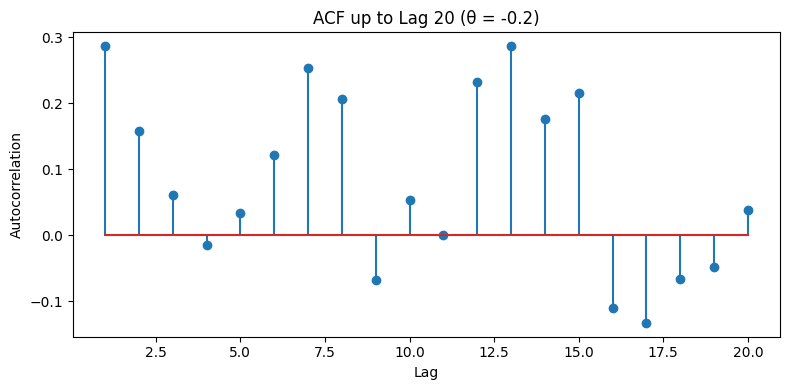

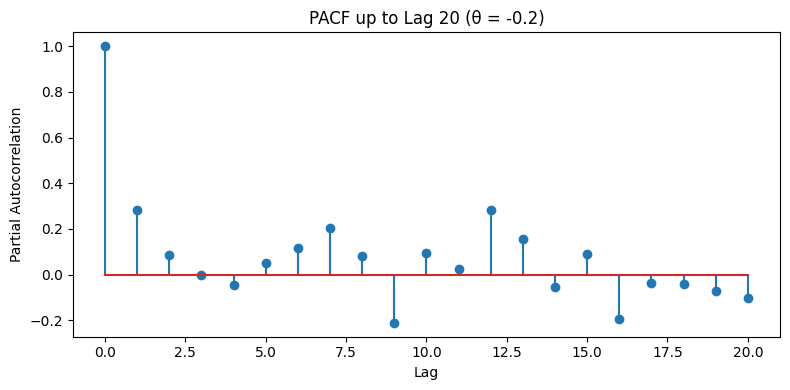

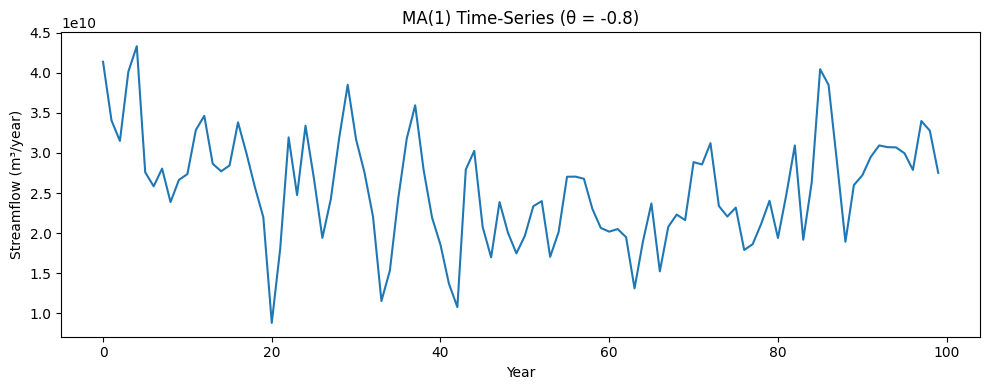

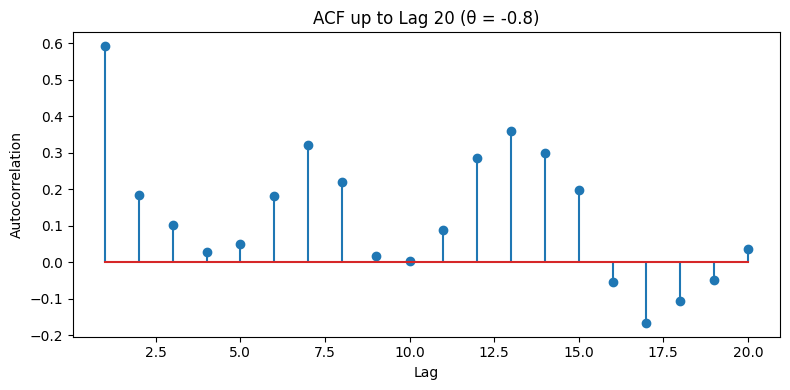

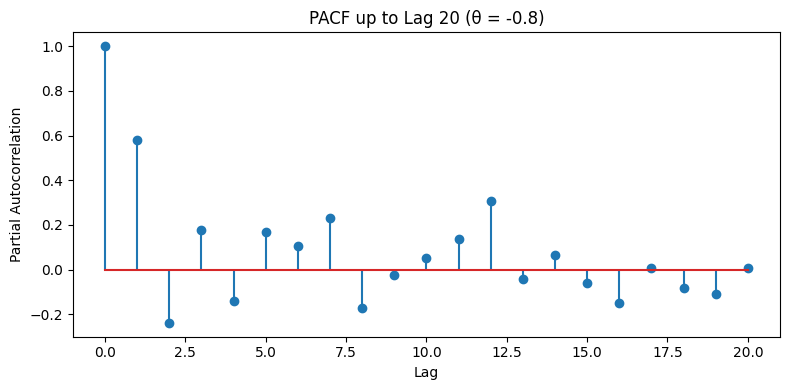

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# -----------------------------
# GIVEN PARAMETERS
# -----------------------------
mu = 2.5e10
sigma = 0.2 * mu
N = 100

theta_values = [0.2, 0.8, -0.2, -0.8]

# -----------------------------
# FUNCTION TO GENERATE MA(1)
# -----------------------------
def generate_ma1(theta):
    np.random.seed(0)
    eps = np.random.normal(0, sigma, N+1)  # need N+1 epsilons
    x = np.zeros(N)
    for t in range(N):
        x[t] = mu + eps[t] - theta * eps[t-1]
    return x

# -----------------------------
# LOOP THROUGH ALL θ VALUES
# -----------------------------
for theta in theta_values:

    x = generate_ma1(theta)

    # ---------- (a) Time-Series ----------
    plt.figure(figsize=(10, 4))
    plt.plot(x)
    plt.title(f"MA(1) Time-Series (θ = {theta})")
    plt.xlabel("Year")
    plt.ylabel("Streamflow (m³/year)")
    plt.tight_layout()
    plt.show()

    # ---------- (b) ACF ----------
    def autocorr(series, lag):
        return np.corrcoef(series[:-lag], series[lag:])[0, 1]

    lags = np.arange(1, 21)
    acf_vals = [autocorr(x, lag) for lag in lags]

    plt.figure(figsize=(8, 4))
    plt.stem(lags, acf_vals)
    plt.title(f"ACF up to Lag 20 (θ = {theta})")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()

    # ---------- (c) PACF ----------
    pac_vals = pacf(x, nlags=20, method='yw')
    lags_full = np.arange(0, 21)

    plt.figure(figsize=(8, 4))
    plt.stem(lags_full, pac_vals)
    plt.title(f"PACF up to Lag 20 (θ = {theta})")
    plt.xlabel("Lag")
    plt.ylabel("Partial Autocorrelation")
    plt.tight_layout()
    plt.show()

-- This answer is for the **d part** --

*   The four AR(1) models exhibit clear differences in persistence and oscillatory behavior depending on the sign and magnitude of the autoregressive parameter ϕ. For positive values of ϕ (0.2 and 0.8), the time-series displays positive correlation between consecutive years, resulting in smoother fluctuations around the mean. When ϕ = 0.8, this persistence is very strong, producing long upward or downward runs; in contrast, ϕ = 0.2 produces only mild memory. For negative values (–0.2 and –0.8), the series becomes oscillatory, with high values tending to be followed by low values and vice-versa. This effect is very pronounced when ϕ = –0.8, where the time-series shows rapid high–low swings. The ACFs of all AR(1) cases decay exponentially, with the rate of decay determined by |ϕ|, while the PACFs show the expected sharp cut-off after lag 1. Overall, the AR(1) results demonstrate how ϕ controls the degree of persistence (for positive ϕ) or oscillation (for negative ϕ) in the streamflow process.


*   The MA(1) models show fundamentally different behavior from the AR models, with dependence restricted mainly to lag 1. Under the class sign convention, positive values of θ (0.2 and 0.8) produce a negative spike in the lag-1 autocorrelation, while negative θ values (–0.2 and –0.8) produce a positive lag-1 correlation. The magnitude of θ controls the strength of this immediate dependence, with θ = ±0.8 showing much more pronounced effects than θ = ±0.2. Importantly, the ACF for all MA(1) models cuts off after lag 1, which matches the theoretical property of MA processes, while the PACF gradually decays across subsequent lags. Visually, MA(1) time-series resemble short-memory noise with only slight smoothing or inversion depending on the sign of θ. These results highlight that MA(1) models have very limited temporal memory compared to AR models, with structure dominated almost entirely by the lag-1 shock term.



*   The ARMA(1,1) models combine autoregressive persistence with moving-average shock smoothing, producing behavior intermediate between pure AR and pure MA processes. For the model with ϕ = 0.3 and θ = 0.7, the effect is a moderately persistent series that is smoother than an MA process but less strongly memory-driven than a high-ϕ AR(1) model. In contrast, the model with ϕ = –0.5 and θ = –0.5 incorporates both negative autoregressive and negative MA effects, resulting in mild oscillatory patterns without the strong alternation seen in the AR(1) model with ϕ = –0.8. For both ARMA models, the ACFs decay more slowly than MA(1) but faster than AR(1) with large |ϕ|, and the PACFs taper off gradually rather than cutting off sharply. These patterns confirm that ARMA models capture both medium-term persistence and short-term shock adjustments, providing greater flexibility than either AR(1) or MA(1) alone.


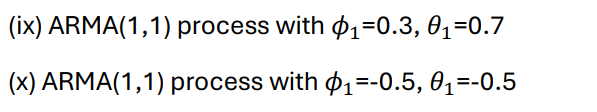

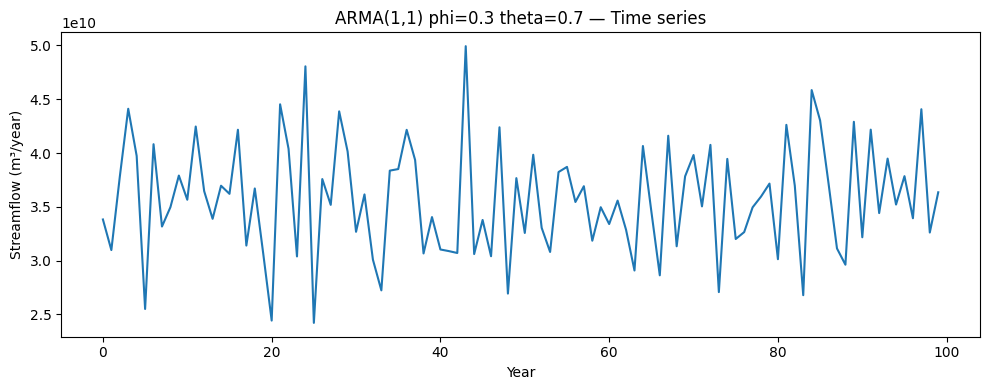

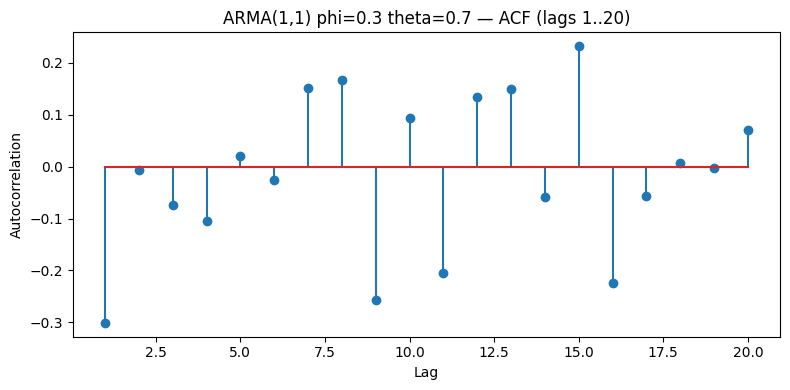

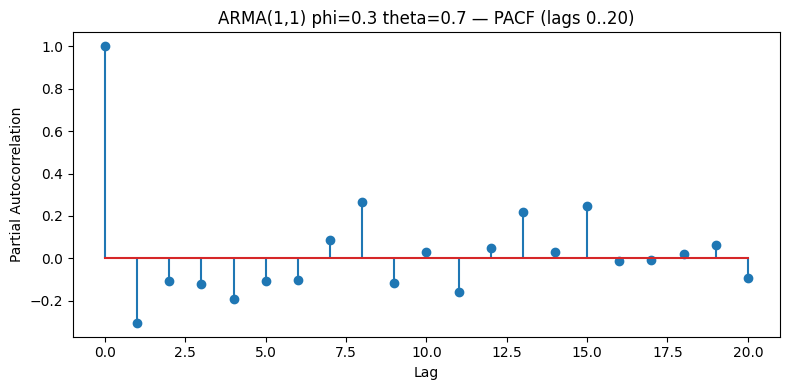

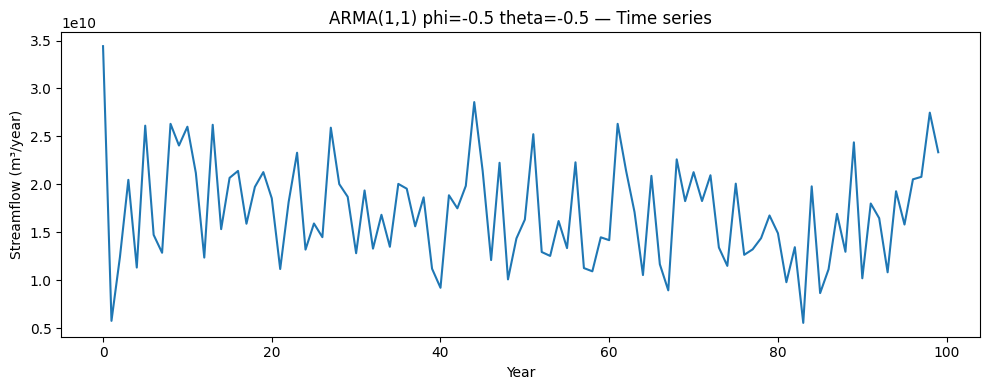

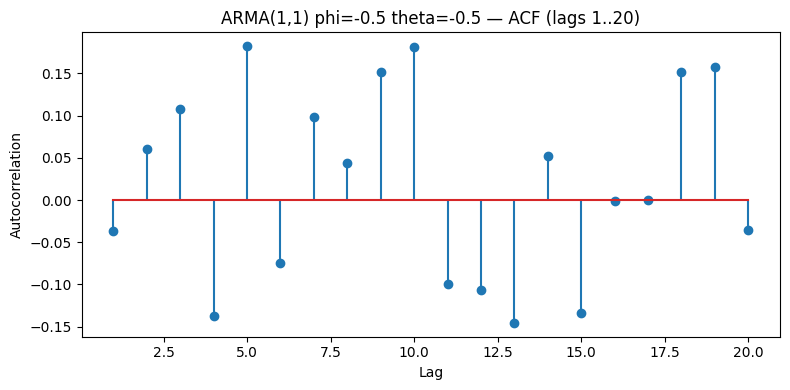

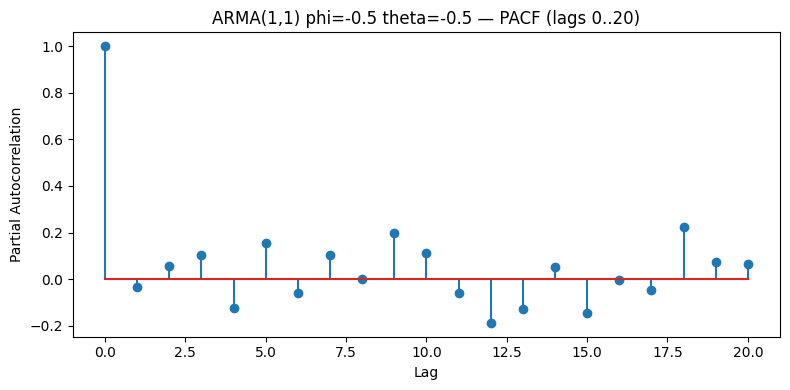

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# -----------------------------
# PARAMETERS
# -----------------------------
mu = 2.5e10
sigma = 0.2 * mu
N = 100

models = [
    {"name": "ARMA(1,1) phi=0.3 theta=0.7",  "phi":  0.3, "theta":  0.7},
    {"name": "ARMA(1,1) phi=-0.5 theta=-0.5", "phi": -0.5, "theta": -0.5}
]

np.random.seed(0)  # overall reproducibility

# -----------------------------
# HELPER FUNCTIONS
# -----------------------------
def generate_arma11(phi, theta, N, mu, sigma):
    """
    Generate ARMA(1,1) with class convention:
      X_t = mu + phi*(X_{t-1} - mu) + eps_t - theta*eps_{t-1}
    eps indexed 0..N (we'll use eps[0]..eps[N-1], eps[-1] considered 0 for t=0)
    """
    eps = np.random.normal(0, sigma, N)   # length N
    x = np.zeros(N)
    # initial value: no AR or MA-1 term (use eps[0])
    x[0] = mu + eps[0]
    for t in range(1, N):
        x[t] = mu + phi * (x[t-1]) + eps[t] - theta * eps[t-1]
    return x

def acf_values(series, maxlag=20):
    """Return ACF values for lags 1..maxlag (sample corr)"""
    vals = []
    for lag in range(1, maxlag+1):
        vals.append(np.corrcoef(series[:-lag], series[lag:])[0,1])
    return np.array(vals)

# -----------------------------
# GENERATE & PLOT EACH MODEL
# -----------------------------
for m in models:
    phi = m["phi"]
    theta = m["theta"]
    name = m["name"]

    # generate series
    x = generate_arma11(phi, theta, N, mu, sigma)

    # --- Time-series plot ---
    plt.figure(figsize=(10,4))
    plt.plot(x)
    plt.title(f"{name} — Time series")
    plt.xlabel("Year")
    plt.ylabel("Streamflow (m³/year)")
    plt.tight_layout()
    plt.show()

    # --- ACF (lags 1..20) ---
    lags = np.arange(1, 21)
    acf_vals = acf_values(x, maxlag=20)
    plt.figure(figsize=(8,4))
    plt.stem(lags, acf_vals)
    plt.title(f"{name} — ACF (lags 1..20)")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()

    # --- PACF (lags 0..20) ---
    pac_vals = pacf(x, nlags=20, method='yw')  # 'yw' works fine
    lags_full = np.arange(0, 21)
    plt.figure(figsize=(8,4))
    plt.stem(lags_full, pac_vals)
    plt.title(f"{name} — PACF (lags 0..20)")
    plt.xlabel("Lag")
    plt.ylabel("Partial Autocorrelation")
    plt.tight_layout()
    plt.show()

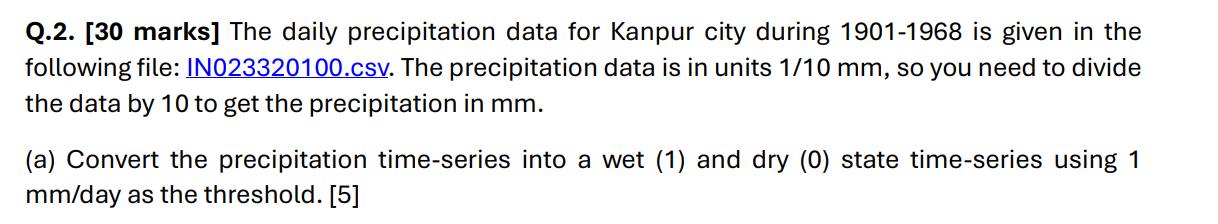

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

# Convert PRCP from 1/10 mm to mm
df["PRCP_mm"] = df["PRCP"] / 10.0

# Create wet/dry time series
# Wet = 1 (PRCP >= 1 mm)
# Dry = 0 (PRCP < 1 mm)
df["WET_DRY"] = np.where(df["PRCP_mm"] >= 1.0, 1, 0)
df.to_csv("wet_dry_timeseries.csv", index=False)

# Display first few rows
print(df.head(20))


        STATION       DATE  LATITUDE  LONGITUDE  ELEVATION        NAME  PRCP  \
0   IN023320100   1/1/1901     26.47      80.35        185  KANPUR, IN    53   
1   IN023320100   1/2/1901     26.47      80.35        185  KANPUR, IN     0   
2   IN023320100   1/3/1901     26.47      80.35        185  KANPUR, IN     0   
3   IN023320100   1/4/1901     26.47      80.35        185  KANPUR, IN     0   
4   IN023320100   1/5/1901     26.47      80.35        185  KANPUR, IN     0   
5   IN023320100   1/6/1901     26.47      80.35        185  KANPUR, IN     0   
6   IN023320100   1/7/1901     26.47      80.35        185  KANPUR, IN     0   
7   IN023320100   1/8/1901     26.47      80.35        185  KANPUR, IN     0   
8   IN023320100   1/9/1901     26.47      80.35        185  KANPUR, IN   109   
9   IN023320100  1/10/1901     26.47      80.35        185  KANPUR, IN     0   
10  IN023320100  1/11/1901     26.47      80.35        185  KANPUR, IN     0   
11  IN023320100  1/12/1901     26.47    

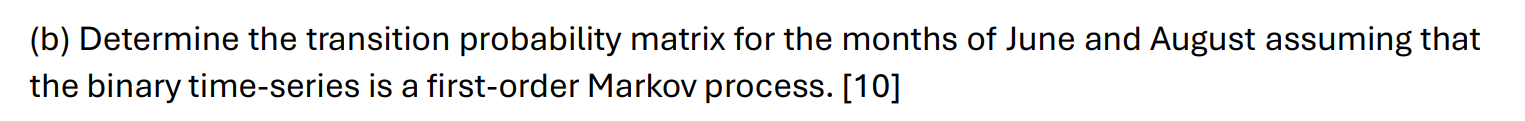

In [30]:
import pandas as pd
import numpy as np

# Configuration
FNAME = "data.csv"      # your file
PRCP_COL = "PRCP"       # precipitation column (in 1/10 mm)
DATE_COL = "DATE"       # date column name
THRESH_MM = 1.0         # wet/dry threshold in mm
MONTHS = {"June": 6, "August": 8}

# Reading csv file and parse date column
df = pd.read_csv(FNAME, parse_dates=[DATE_COL], dayfirst=False, infer_datetime_format=True)

# If parse_dates didn't work because DATE is like "1/1/1901" as string, try:
if not np.issubdtype(df[DATE_COL].dtype, np.datetime64):
    df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors='coerce', dayfirst=False)

# Drop rows with invalid dates
df = df.dropna(subset=[DATE_COL]).copy()

# Converting PRCP from tenths of mm to mm (handle non-numeric)
df[PRCP_COL] = pd.to_numeric(df[PRCP_COL], errors='coerce').fillna(0)
df["PRCP_mm"] = df[PRCP_COL] / 10.0

# Building wet/dry column: 1 if PRCP_mm >= threshold else 0
df["WET_DRY"] = (df["PRCP_mm"] >= THRESH_MM).astype(int)

# Adding year and month columns for grouping
df["year"] = df[DATE_COL].dt.year
df["month"] = df[DATE_COL].dt.month
df["day"] = df[DATE_COL].dt.day

def transition_matrix_for_month(month_num):

    # Filter rows of that month
    dfm = df[df["month"] == month_num].copy()
    # sort by year then day to ensure chronological order per year
    dfm = dfm.sort_values(["year", "day"])

    # now we'll collect transitions within each year (so they don't cross month boundaries)
    counts = np.zeros((2,2), dtype=int)  # counts[from_state, to_state]
    for y, group in dfm.groupby("year"):
        series = group.sort_values("day")["WET_DRY"].values
        if len(series) < 2:
            continue
        # compute transitions
        from_states = series[:-1]
        to_states   = series[1:]
        for a, b in zip(from_states, to_states):
            counts[int(a), int(b)] += 1

    # Converting to probabilities by dividing each row by row sum (if row sum > 0)
    probs = np.zeros_like(counts, dtype=float)
    for i in [0,1]:
        row_sum = counts[i].sum()
        if row_sum > 0:
            probs[i] = counts[i] / row_sum
        else:
            probs[i] = np.nan  # no occurrences of state i

    # Return counts and probs as DataFrames for nicer printing
    counts_df = pd.DataFrame(counts, index=["from 0 (dry)", "from 1 (wet)"],
                             columns=["to 0 (dry)", "to 1 (wet)"])
    probs_df  = pd.DataFrame(np.round(probs, 4), index=counts_df.index, columns=counts_df.columns)
    return counts_df, probs_df

# Computing for June and August and print
for name, m in MONTHS.items():
    counts_df, probs_df = transition_matrix_for_month(m)
    print(f"\n--- {name} (month={m}) ---")
    print("Transition COUNT matrix (rows=from, cols=to):")
    print(counts_df)
    print("\nTransition PROBABILITY matrix (rows=from, cols=to):")
    print(probs_df)


/tmp/ipython-input-1401262383.py:13: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(FNAME, parse_dates=[DATE_COL], dayfirst=False, infer_datetime_format=True)



--- June (month=6) ---
Transition COUNT matrix (rows=from, cols=to):
              to 0 (dry)  to 1 (wet)
from 0 (dry)        1458         172
from 1 (wet)         157          98

Transition PROBABILITY matrix (rows=from, cols=to):
              to 0 (dry)  to 1 (wet)
from 0 (dry)      0.8945      0.1055
from 1 (wet)      0.6157      0.3843

--- August (month=8) ---
Transition COUNT matrix (rows=from, cols=to):
              to 0 (dry)  to 1 (wet)
from 0 (dry)         688         358
from 1 (wet)         364         568

Transition PROBABILITY matrix (rows=from, cols=to):
              to 0 (dry)  to 1 (wet)
from 0 (dry)      0.6577      0.3423
from 1 (wet)      0.3906      0.6094


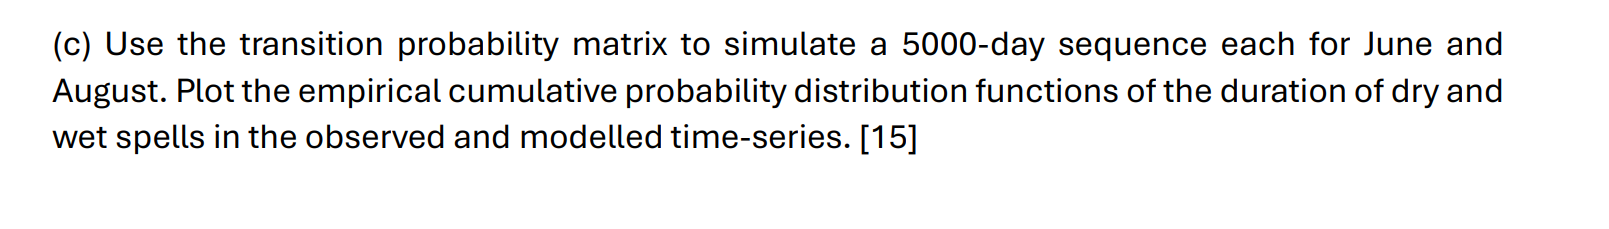

June Transition Matrix:
 [[0.89447853 0.10552147]
 [0.61568627 0.38431373]]

August Transition Matrix:
 [[0.65774379 0.34225621]
 [0.39055794 0.60944206]]


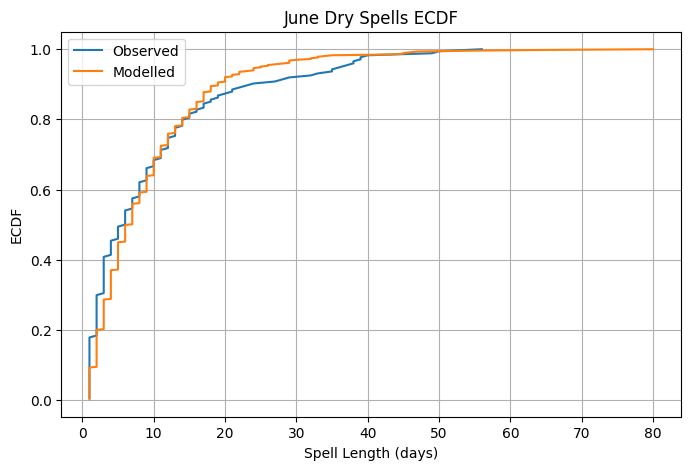

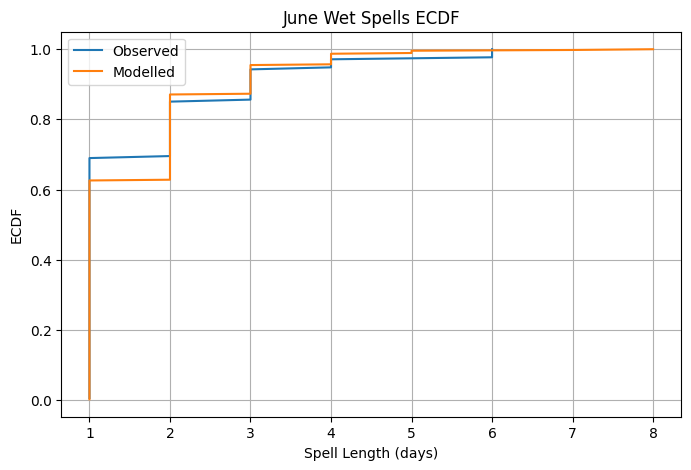

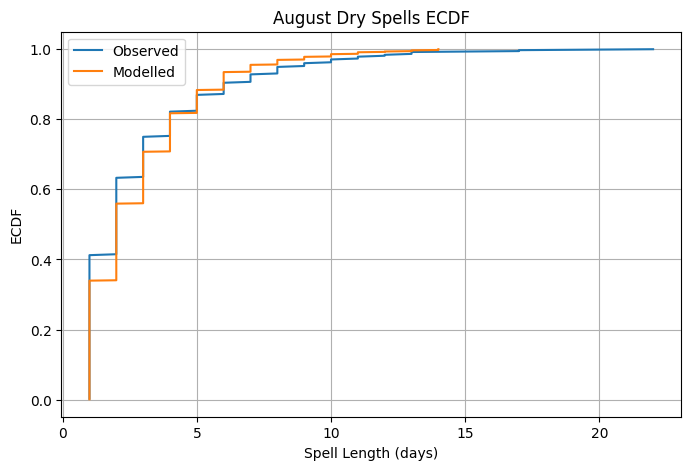

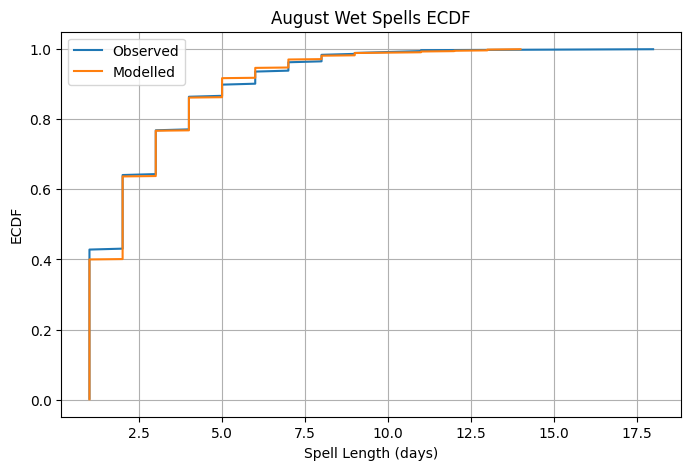

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", parse_dates=["DATE"])
df["PRCP_mm"] = pd.to_numeric(df["PRCP"], errors="coerce").fillna(0) / 10.0
df["WET_DRY"] = (df["PRCP_mm"] >= 1.0).astype(int)
df["month"] = df["DATE"].dt.month
df["year"]  = df["DATE"].dt.year
df["day"]   = df["DATE"].dt.day

# FUNCTION TO GET THE MONTH-WISE TRANSITION PROBABILITY MATRIX
def get_transition_matrix(month):
    dfm = df[df["month"] == month].sort_values(["year", "day"])

    counts = np.zeros((2,2))

    for y, group in dfm.groupby("year"):
        s = group["WET_DRY"].values
        if len(s) < 2:
            continue
        for a, b in zip(s[:-1], s[1:]):
            counts[a, b] += 1

    # probability matrix
    P = counts / counts.sum(axis=1, keepdims=True)
    return P, counts

# matrices for June and August
P_june, C_june = get_transition_matrix(6)
P_august, C_august = get_transition_matrix(8)

print("June Transition Matrix:\n", P_june)
print("\nAugust Transition Matrix:\n", P_august)

# SIMULATE 5000-DAY MARKOV CHAIN (using U(0,1))
def simulate_markov(P, n_days=5000):
    seq = np.zeros(n_days, dtype=int)

    # initial state according to stationary distribution or choose last observed
    pi = np.linalg.matrix_power(P, 1000)[0]   # approx steady-state
    seq[0] = np.random.choice([0,1], p=pi)

    for t in range(1, n_days):
        u = np.random.random()
        if seq[t-1] == 0:
            # row 0 → [p00 p01]
            seq[t] = 0 if u < P[0,0] else 1
        else:
            # row 1 → [p10 p11]
            seq[t] = 0 if u < P[1,0] else 1

    return seq

sim_june   = simulate_markov(P_june)
sim_august = simulate_markov(P_august)

# FUNCTION TO COMPUTE SPELL LENGTHS
def get_spells(series):
    spells_dry = []
    spells_wet = []

    current = series[0]
    length = 1

    for i in range(1, len(series)):
        if series[i] == current:
            length += 1
        else:
            if current == 0:
                spells_dry.append(length)
            else:
                spells_wet.append(length)
            current = series[i]
            length = 1

    # last spell
    if current == 0:
        spells_dry.append(length)
    else:
        spells_wet.append(length)

    return spells_dry, spells_wet

# observed spells
obs_june  = get_spells(df[df["month"]==6]["WET_DRY"].values)
obs_aug   = get_spells(df[df["month"]==8]["WET_DRY"].values)

# simulated spells
sim_june_spells  = get_spells(sim_june)
sim_aug_spells   = get_spells(sim_august)

# PLOT ECDFs
def plot_ecdf(observed, simulated, title):
    obs = np.sort(observed)
    sim = np.sort(simulated)

    plt.figure(figsize=(8,5))

    plt.plot(obs,  np.arange(1, len(obs)+1)/len(obs), label="Observed")
    plt.plot(sim,  np.arange(1, len(sim)+1)/len(sim), label="Modelled")

    plt.xlabel("Spell Length (days)")
    plt.ylabel("ECDF")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# JUNE
plot_ecdf(obs_june[0], sim_june_spells[0], "June Dry Spells ECDF")
plot_ecdf(obs_june[1], sim_june_spells[1], "June Wet Spells ECDF")

# AUGUST
plot_ecdf(obs_aug[0], sim_aug_spells[0], "August Dry Spells ECDF")
plot_ecdf(obs_aug[1], sim_aug_spells[1], "August Wet Spells ECDF")
